Conjunto Datos de solicitudes de medicamentos e insumos de tipo Prioridad 1 dentro de una clínica de complejidad 4to nivel.  Generados desde el 1ro de febrero de 2024 al 20 de marzo 2024.

Atencción en salud de 4to Nivel: Que se atienden pacientes de varias Patologia Graves o que son complicados, diferente a procedimientos ambulatorios.

Descripción:
Este conjunto de datos contiene varias características de las solicitudes hechas a la farmacia principal de una clinica de 4to nivel, con sus fechas de solicitud y despacho correspondientes, cantidad de productos, tipo de formulacion y usuario que despacha la solicitud. 

Objetivo del análisis exploratorio: Identificar las brechas en el proceso de alistamiento de medicamentos y dispositivos médicos de inicios y cambios, con la finalidad de intervernirlos y así mejorar los tiempos de alistamiento.

Características:

solicitud_id: Identificador único de la solicitud, todos los registros de bentenerlo.

documento_despacho_id: Documento único de registro del despacho de medicamentos o insumos, no todos los registros lo tienen.

tipo_solicitud: Medicamentos o Insumos, no se combinan en una misma solicitud.

ingreso: Identificador único del paciente que distingue una hospitalización de otra de un mismo paciente.

lista_datos_formulacion: Tipos de formulación en la solicitud.

lista_datos_productos: Códigos de los productos solicitados en una misma solicitud.

cant_productos: Cantidad de productos en la solicitud, sin discriminar el tipo de producto.

estacion_id: Estación de enfermería donde se hizo la solicitud.

cama: Cama que ocupaba el paciente cuando se hizo la solicitud.

paciente_id: Identificador único de un paciente.

usuario_id_solicita: Identificador único en el sistema del usuario que realizó la solicitud.

date_sol: Fecha y hora de la solicitud.

usuario_id_despacha: Identificador único en el sistema del usuario que alistó y despachó la solicitud.

date_dispatch: Fecha y hora de despacho de la solicitud.

mins_enf_to_despacho2: Minutos transcurridos entre la solicitud y el despacho.

date_solpatin: Fecha y hora de solicitud del patinador que traslada los productos al interior de la clínica.

mins_despacho_to_patin2: Tiempo transcurrido entre el despacho y la solicitud del patinador.


Uso:

Conjunto de datos provisto para el análisis de la influencia de las variables en el tiempo final de despacho.

### Procesamiento de los datos
####    De acuerdo a un caso real presentado al interior de la clínica, en donde surge la necesidad de evaluar los causantes o novedades el proceso de alistamiento de medicamentos e insumos para el despacho de solicitudes y de acuerdo a la pregunta Smart, se implenta una consulta que pueda traer los datos o características de una solicitud.

#### En el recorrido del proceso se evidenciaron anomalías como por ejemplo la no captura de datos, lo cual en el momento de generar el reporte arroja nulos en las columnas de algunos registros, de entrada se puede decir que estos datos no se usarán para el análisis exploratorio y que de alguna forma afecta el análisis dado que resta cantidad de registros para la prueba.

#### A favor del sistema podemos decir que la evidencia de estas anomalías incurre en la solicitud de desarrollo para corregirlas.

#### Para facilitar el tiempo de generación de los datos al momento de realizar la consulta se decide obviar datos que impliquen largas cadenas de caracteres, nombres de pacientes y nombres de usuarios del sistema y se trabaja con los datos identificadores numéricos de estos entes, lo que también es favorable para el análisis exploratorio del conjunto de datos.






## 1. PREGUNTA SMART
## ¿Cuáles características en una solicitud de medicamentos o insumos son más influyentes en el tiempo de despacho?

In [2]:
# Importar bibliotecas necesarias
import pandas as pd # pandas me sirve para leer los dataset
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from pandas import DataFrame

### Paso 2: Obtener los datos - Cargar el archivo CSV

### Evidencia: Según la pregunta smart, es afirmativo que los datos provistos podrían responderla.

In [3]:
ruta_archivo = (r'C:\Users\kenny\eda_couse\data\DataSetDespachosFarmacia.csv')  # Lectura de mi archivo CSV
data = pd.read_csv(ruta_archivo)

In [4]:
num_registros_total = len(data)
num_registros_total

22744

### Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio
####     Imprimo información básica sobre el conjunto de datos

In [5]:
# Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio

# Imprimo información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22744 entries, 0 to 22743
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solicitud_id             22744 non-null  int64  
 1   documento_despacho_id    20384 non-null  float64
 2   tipo_solicitud           22744 non-null  object 
 3   ingreso                  22744 non-null  int64  
 4   lista_datos_formulacion  22744 non-null  object 
 5   lista_datos_productos    20384 non-null  object 
 6   cant_productos           22744 non-null  int64  
 7   estacion_id              22744 non-null  object 
 8   cama                     13089 non-null  object 
 9   paciente_id              22744 non-null  object 
 10  usuario_id_solicita      22744 non-null  int64  
 11  date_sol                 22744 non-null  object 
 12  usuario_id_despacha      20384 non-null  float64
 13  date_dispatch            20384 non-null  

### Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio
##### Creo un dataframe a partir de mi dataset

In [6]:
# Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio
# Creo un dataframe a partir de mi dataset
# De nuevo consulto las características de mi dataset
df_temp = pd.DataFrame(data)
print("DataFrame antes de la conversión:")

DataFrame antes de la conversión:


In [7]:
print("Información del conjunto de datos:")
print(df_temp.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22744 entries, 0 to 22743
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solicitud_id             22744 non-null  int64  
 1   documento_despacho_id    20384 non-null  float64
 2   tipo_solicitud           22744 non-null  object 
 3   ingreso                  22744 non-null  int64  
 4   lista_datos_formulacion  22744 non-null  object 
 5   lista_datos_productos    20384 non-null  object 
 6   cant_productos           22744 non-null  int64  
 7   estacion_id              22744 non-null  object 
 8   cama                     13089 non-null  object 
 9   paciente_id              22744 non-null  object 
 10  usuario_id_solicita      22744 non-null  int64  
 11  date_sol                 22744 non-null  object 
 12  usuario_id_despacha      20384 non-null  float64
 13  date_dispatch            20384 non-null  

In [8]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ['paciente_id', 'date_sol', 'date_dispatch', 'date_solpatin']

df = df_temp.drop(columns=columnas_a_eliminar)

### Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio
#### Consulto si existen valores nulos en mi conjunto de datos

In [9]:
# Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio

# Consulto si existen valores nulos en mi conjunto de datos
df.isnull().sum()

solicitud_id                  0
documento_despacho_id      2360
tipo_solicitud                0
ingreso                       0
lista_datos_formulacion       0
lista_datos_productos      2360
cant_productos                0
estacion_id                   0
cama                       9655
usuario_id_solicita           0
usuario_id_despacha        2360
mins_enf_to_despacho2      2360
mins_despacho_to_patin2    2537
dtype: int64

### Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio.

#### En la revisión de las filas que contienen al menos una columna nula podemos ver que la columna representada por la cama contiene muchos nulos, esto corresponde a practicamente todas las solicitudes de insumos, dado que es precisamente sobre este tipo de solicitudes que no se guarda este dato.

#### La inconsistencia tiene explicación a nivel técnica, pero se procese a implementar la respectiva mejora para corregir este faltante.

#### En este primer análisis de nulos también se puede observar que la columna documento de despacho contiene bastantes nulos, lo que indica que:
#####   1ro En primera instancia, pueden ser solicitudes que no se han despachado.
#####   2do pueden haber sido canceladas por alguna razón, lo cula se puede deducir debido a la fecha de algunas solicitudes de las que tienen valor nulo en esta columna.

##### Podemos observar también que esta misma cantidad de nulos se observan para las columnas de fecha de despacho, usuario de despacho y minutos transcurridos entre la solicitud y el despacho.

##### También se observa que la columna fecha de solicitud del patinador y minutos transcurridos entre el despacho y la solicitud del patinador contienen la misma cantidad y mas de registros nulos a comparación de los documentos de despacho, esto se explica porque aquí están incluídos los registros que no contienen documento de despacho mas los registros que aunque tienen documento de despacho aún no se les ha solicitado el patinador.


##### La variable que mas afecta es la de columna cama, debido a que resta el análisis de los insumos, y resta gran cantidad de registros para la prueba en los que disminuye quiza la dispersión del comportamientos de despachos.

### Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio
##### Quitamos datos nulos

In [10]:
df = df.dropna(axis=0)

print("Información del conjunto de datos:")
print(df.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 12322 entries, 0 to 22743
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solicitud_id             12322 non-null  int64  
 1   documento_despacho_id    12322 non-null  float64
 2   tipo_solicitud           12322 non-null  object 
 3   ingreso                  12322 non-null  int64  
 4   lista_datos_formulacion  12322 non-null  object 
 5   lista_datos_productos    12322 non-null  object 
 6   cant_productos           12322 non-null  int64  
 7   estacion_id              12322 non-null  object 
 8   cama                     12322 non-null  object 
 9   usuario_id_solicita      12322 non-null  int64  
 10  usuario_id_despacha      12322 non-null  float64
 11  mins_enf_to_despacho2    12322 non-null  float64
 12  mins_despacho_to_patin2  12322 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usag

#### Cantidad de registros eliminados:

In [11]:
# Cantidad de registros eliminados:
22746-12310

10436

In [12]:
num_registros_total = len(df)
num_registros_total

12322

In [14]:
df['documento_despacho_id'] = df['documento_despacho_id'].astype(int)
# df['paciente_id'] = df['paciente_id'].astype(int64)
#df['usuario_id_despacha'] = df['usuario_id_despacha'].astype(int)

In [15]:
print("Información del conjunto de datos:")
print(df.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 12322 entries, 0 to 22743
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solicitud_id             12322 non-null  int64  
 1   documento_despacho_id    12322 non-null  int32  
 2   tipo_solicitud           12322 non-null  object 
 3   ingreso                  12322 non-null  int64  
 4   lista_datos_formulacion  12322 non-null  object 
 5   lista_datos_productos    12322 non-null  object 
 6   cant_productos           12322 non-null  int64  
 7   estacion_id              12322 non-null  object 
 8   cama                     12322 non-null  object 
 9   usuario_id_solicita      12322 non-null  int64  
 10  usuario_id_despacha      12322 non-null  float64
 11  mins_enf_to_despacho2    12322 non-null  float64
 12  mins_despacho_to_patin2  12322 non-null  float64
dtypes: float64(3), int32(1), int64(4), object(5)
m

### Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio
##### Vamos a dividir el DataSet en variables numéricas y categóricas

In [16]:
# Variables numéricas
numericas = df.select_dtypes(include=['int', 'float'])

# Variables categóricas
categoricas = df.select_dtypes(include=['object', 'category'])

# Mostrar las variables numéricas y categóricas
print("Variables numéricas:")
print(numericas)

print("\nVariables categóricas:")
print(categoricas)

Variables numéricas:
       solicitud_id  documento_despacho_id  ingreso  cant_productos  \
0          13708386               12802961  6199288               3   
1          13710100               12804843  6199288               4   
3          13714710               12808841  6199288               1   
4          13714730               12808857  6199288               4   
5          13715869               12809894  6199288               2   
...             ...                    ...      ...             ...   
22738      13782048               12869621  6221150               1   
22739      13782380               12869780  6221150               2   
22741      13784005               12871021  6221150               1   
22742      13785217               12872190  6221150               2   
22743      13787282               12874328  6221150               7   

       usuario_id_solicita  usuario_id_despacha  mins_enf_to_despacho2  \
0                    13733              15459.0     

#### Paso 3: Analizar Estructura del Dataset - Análisis Exploratorio
#####  Expandir área visualizción de los registros

In [17]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [18]:
df.tail(3)

,solicitud_id,documento_despacho_id,tipo_solicitud,ingreso,lista_datos_formulacion,lista_datos_productos,cant_productos,estacion_id,cama,usuario_id_solicita,usuario_id_despacha,mins_enf_to_despacho2,mins_despacho_to_patin2
22741,13784005,12871021,M,6221150,1-NORMAL,2-0102051109,1,5B,532,11498,7646.0,17.51,0.48
22742,13785217,12872190,M,6221150,1-NORMAL,"2-0102012120,3-0102011928",2,5B,532,14225,15576.0,6.96,3.01
22743,13787282,12874328,M,6221150,1-NORMAL,"1-0101021901,1-0101022311,2-0101022366,2-0101022369,2-0102011928,2-0102012120,6-0101022161",7,5B,532,15330,14882.0,96.97,29.11


### PASO 4: INICIAMOS ANÁLISIS UNIVARIADO CATEGÓRICAS

In [19]:
# PASO 4: INICIAMOS ANÁLISIS UNIVARIADO CATEGÓRICAS

valores_unicos_tipo_solicitud = df['tipo_solicitud'].unique()

valores_unicos_tipo_solicitud = sorted(valores_unicos_tipo_solicitud)
valores_unicos_tipo_solicitud

['M']

In [20]:
valores_unicos_tipo_solicitud = df['lista_datos_formulacion'].unique()

valores_unicos_tipo_solicitud = sorted(valores_unicos_tipo_solicitud)
valores_unicos_tipo_solicitud

['1-NORMAL',
 '1-NORMAL,2-RESCATE',
 '1-NORMAL,3-CARGA',
 '1-NORMAL,4-PREPARACION MAGISTRAL',
 '1-NORMAL,5-NUTRICION PARENTERAL',
 '1-NORMAL,7-ONCOLOGIA',
 '1-NORMAL,8-AMBULATORIA',
 '1-NORMAL,9-MEDICAMENTOS MEZCLAS NORMAL',
 '2-RESCATE',
 '3-CARGA',
 '4-PREPARACION MAGISTRAL',
 '5-NUTRICION PARENTERAL',
 '5-NUTRICION PARENTERAL,7-ONCOLOGIA',
 '7-ONCOLOGIA',
 '7-ONCOLOGIA,9-MEDICAMENTOS MEZCLAS NORMAL',
 '8-AMBULATORIA',
 '9-MEDICAMENTOS MEZCLAS NORMAL']

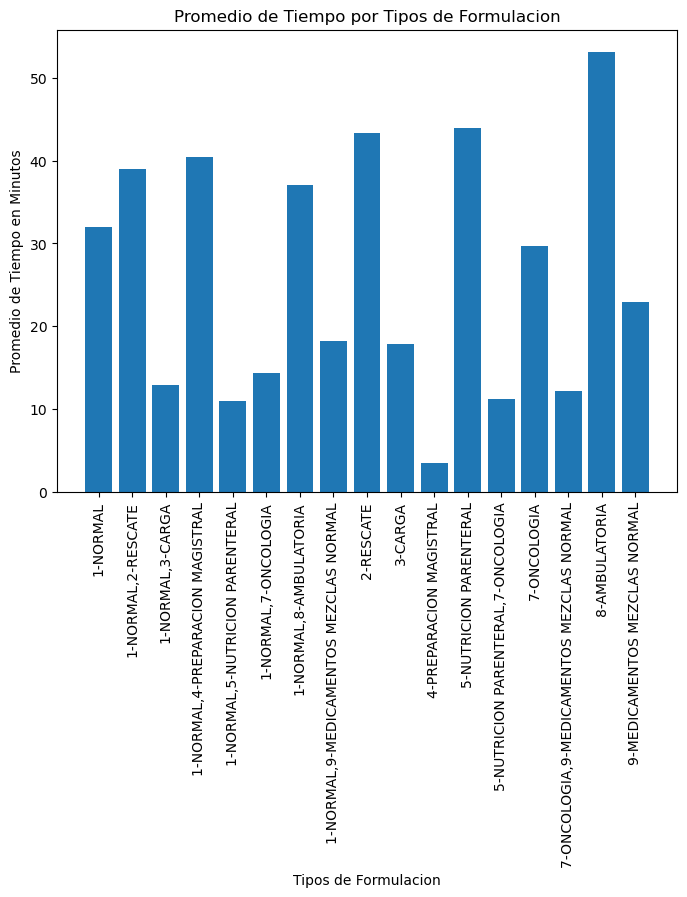

In [21]:
import matplotlib.pyplot as plt

# Agrupa los datos por la variable categórica y calcula el promedio de la variable numérica para cada categoría
promedio_por_categoria = df.groupby('lista_datos_formulacion')['mins_enf_to_despacho2'].mean()
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)

# Grafica el promedio por categoría
plt.bar(promedio_por_categoria.index, promedio_por_categoria)
plt.xlabel('Tipos de Formulacion')
plt.ylabel('Promedio de Tiempo en Minutos')
plt.title('Promedio de Tiempo por Tipos de Formulacion')
plt.show()

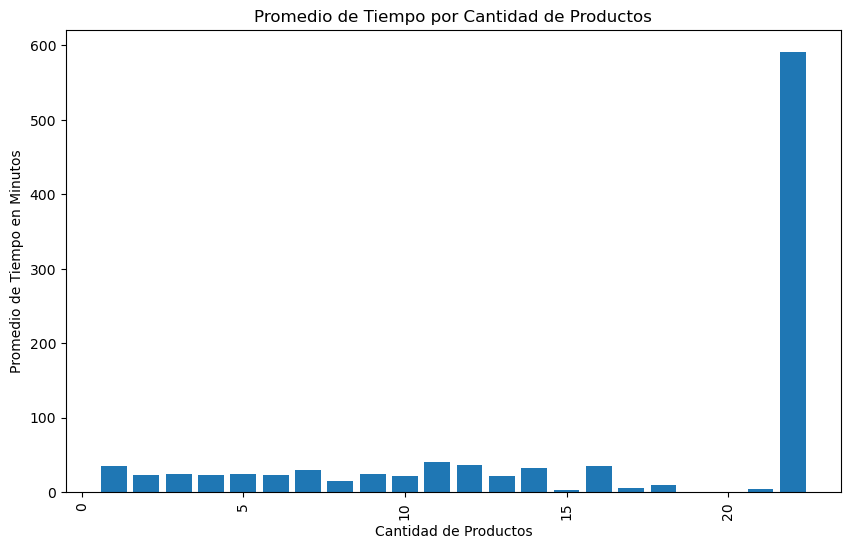

In [22]:
import matplotlib.pyplot as plt

# Agrupa los datos por la variable categórica y calcula el promedio de la variable numérica para cada categoría
promedio_por_categoria = df.groupby('cant_productos')['mins_enf_to_despacho2'].mean()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)

# Grafica el promedio por categoría
plt.bar(promedio_por_categoria.index, promedio_por_categoria)
plt.xlabel('Cantidad de Productos')
plt.ylabel('Promedio de Tiempo en Minutos')
plt.title('Promedio de Tiempo por Cantidad de Productos')
plt.show()

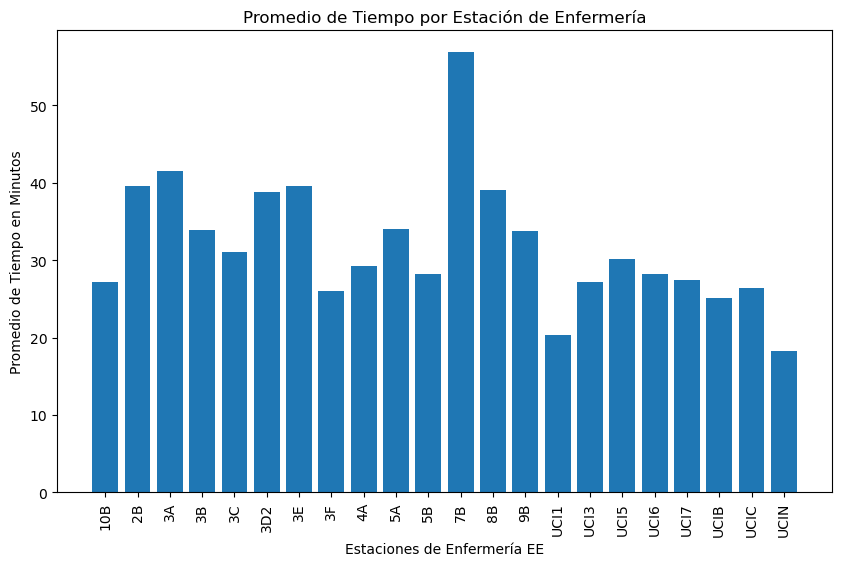

In [23]:
import matplotlib.pyplot as plt

# Agrupa los datos por la variable categórica y calcula el promedio de la variable numérica para cada categoría
promedio_por_categoria = df.groupby('estacion_id')['mins_enf_to_despacho2'].mean()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)

# Grafica el promedio por categoría
plt.bar(promedio_por_categoria.index, promedio_por_categoria)
plt.xlabel('Estaciones de Enfermería EE')
plt.ylabel('Promedio de Tiempo en Minutos')
plt.title('Promedio de Tiempo por Estación de Enfermería')
plt.show()

#### Convertimos a string el tipo de dato del identificador del usuario que despacha la solicitud, para poder graficar todos los usuarios y sus tiempos de respuesta.

In [25]:
df['usuario_id_despacha'] = df['usuario_id_despacha'].astype(str)

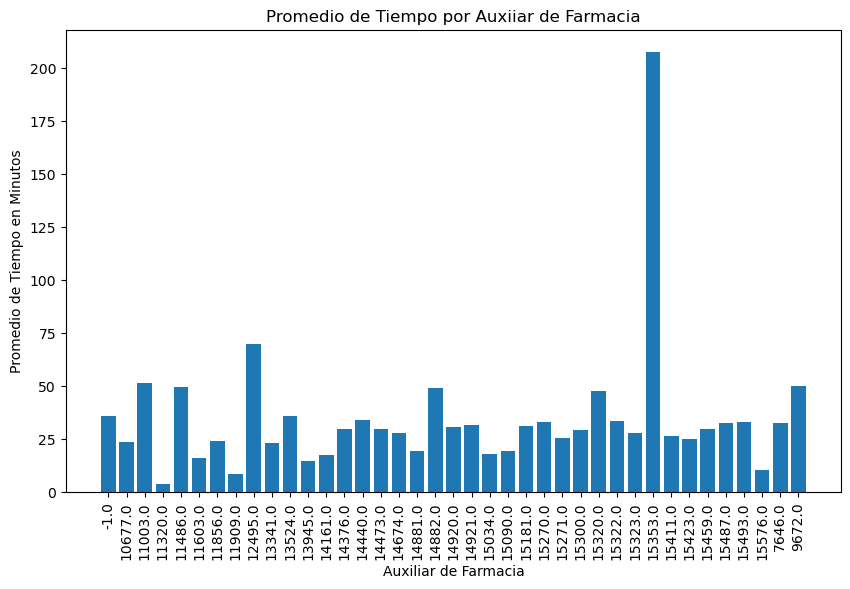

In [26]:
import matplotlib.pyplot as plt

# Agrupa los datos por la variable categórica y calcula el promedio de la variable numérica para cada categoría
promedio_por_categoria = df.groupby('usuario_id_despacha')['mins_enf_to_despacho2'].mean()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)

# Grafica el promedio por categoría
plt.bar(promedio_por_categoria.index, promedio_por_categoria)
plt.xlabel('Auxiliar de Farmacia')
plt.ylabel('Promedio de Tiempo en Minutos')
plt.title('Promedio de Tiempo por Auxiiar de Farmacia')
plt.show()

#### Contar la cantidad de solicitudes despachadas por Auxiliar de Farmacia y obtener el histograma:

In [27]:
df_temp = pd.DataFrame(df)

# Calcular las ocurrencias de cada valor en la columna 'usuario_id_despacha'
ocurrencias = df_temp['usuario_id_despacha'].value_counts()

# Crear un nuevo DataFrame a partir del resultado de las ocurrencias
df_aux_farm = pd.DataFrame({'usuario_id_despacha': ocurrencias.index, 'cant_solicitudes': ocurrencias.values})


In [28]:
df_aux_farm.head(40)

,usuario_id_despacha,cant_solicitudes
0,15300.0,1027
1,-1.0,884
2,13945.0,626
3,14376.0,608
4,15487.0,590
5,14440.0,586
6,15270.0,539
7,11856.0,482
8,11486.0,473
9,13524.0,456


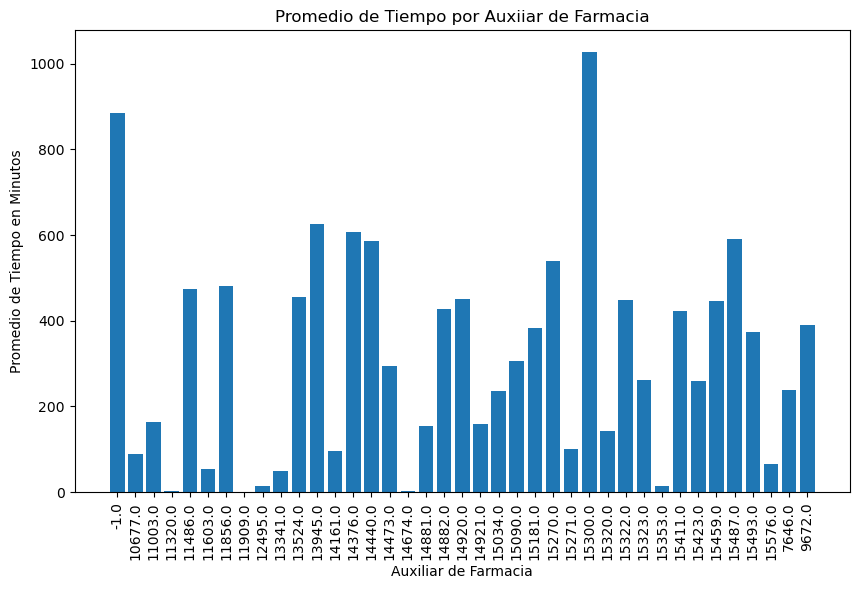

In [30]:
import matplotlib.pyplot as plt

# Agrupa los datos por la variable categórica y calcula el promedio de la variable numérica para cada categoría
promedio_por_categoria = df_aux_farm.groupby('usuario_id_despacha')['cant_solicitudes'].mean()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)

# Grafica el promedio por categoría
plt.bar(promedio_por_categoria.index, promedio_por_categoria)
plt.xlabel('Auxiliar de Farmacia')
plt.ylabel('Promedio de Tiempo en Minutos')
plt.title('Promedio de Tiempo por Auxiiar de Farmacia')
plt.show()

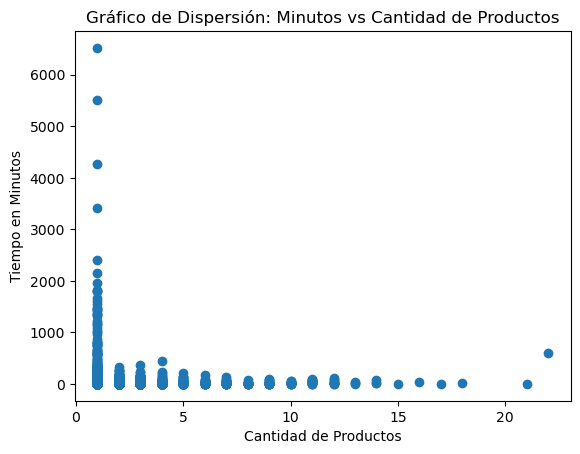

In [31]:
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión
plt.scatter(df['cant_productos'], df['mins_enf_to_despacho2'])

# Añadir etiquetas y título
plt.xlabel('Cantidad de Productos')
plt.ylabel('Tiempo en Minutos')
plt.title('Gráfico de Dispersión: Minutos vs Cantidad de Productos')

# Mostrar la gráfica
plt.show()

In [32]:

contador = df['lista_datos_formulacion'].astype(str).apply(lambda x: x.count('4-PREPARACION MAGISTRAL')).sum()
contador

2

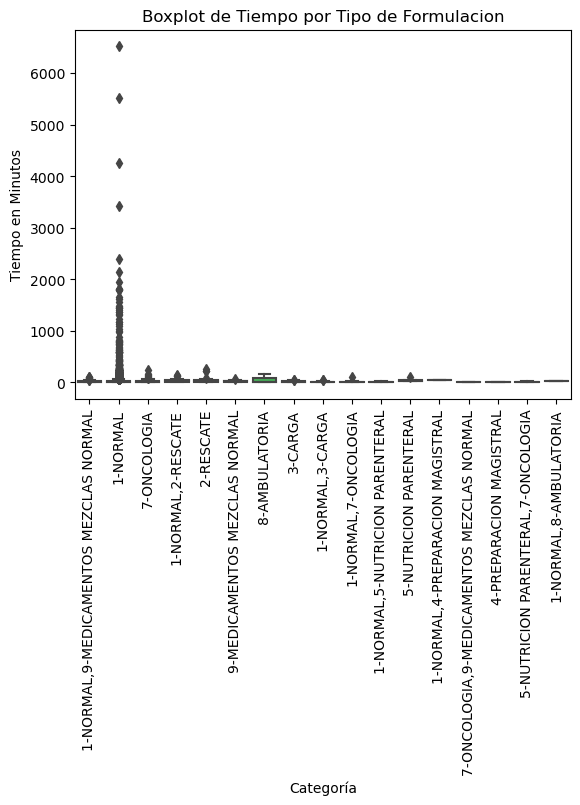

In [33]:
import seaborn as sns

# Grafica un boxplot de la variable numérica para cada categoría
sns.boxplot(x=df['lista_datos_formulacion'], y=df['mins_enf_to_despacho2'], data=df)
plt.xticks(rotation=90)
plt.xlabel('Categoría')
plt.ylabel('Tiempo en Minutos')
plt.title('Boxplot de Tiempo por Tipo de Formulacion')
plt.show()

In [34]:
#df['CarreteraPrincipal'] = df['CarreteraPrincipal'].replace({"yes": 1, "no": 0})
df['tipo_solicitud'] = df['tipo_solicitud'].replace({"M": 1, "I": 0})

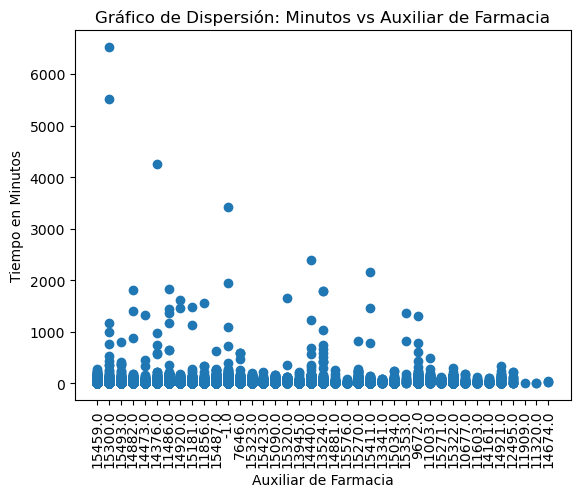

In [66]:
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión
plt.scatter(df['usuario_id_despacha'], df['mins_enf_to_despacho2'])
plt.xticks(rotation=90)
# Añadir etiquetas y título
plt.xlabel('Auxiliar de Farmacia')
plt.ylabel('Tiempo en Minutos')
plt.title('Gráfico de Dispersión: Minutos vs Auxiliar de Farmacia')

# Mostrar la gráfica
plt.show()

In [36]:
contador = df['estacion_id'].astype(str).apply(lambda x: x.count('3E')).sum()
contador

1031

In [37]:
conteo_valores = df['estacion_id'].value_counts()
conteo_valores

estacion_id
UCIB    1461
3E      1031
UCI6     925
UCI5     814
5A       778
8B       755
4A       645
UCIC     610
UCI1     573
9B       546
5B       543
2B       506
10B      478
7B       432
UCI3     382
3B       375
3C       325
3D2      311
3A       297
3F       215
UCI7     189
UCIN     131
Name: count, dtype: int64

## Histograma de la frecuencia de Estaciones de Enfermería

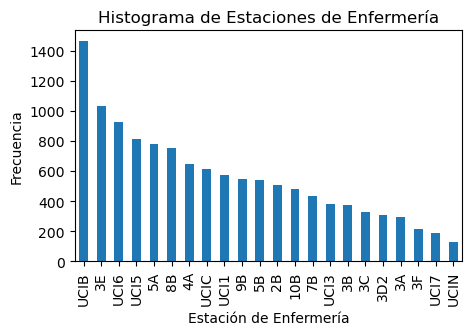

In [38]:
conteos = df['estacion_id'].value_counts()
plt.figure(figsize=(5, 3))

# Crea el histograma de variables categóricas utilizando gráficos de barras
conteos.plot(kind='bar')

# Personaliza el gráfico
plt.title('Histograma de Estaciones de Enfermería')
plt.xlabel('Estación de Enfermería')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

In [39]:
conteo_valores = df['cama'].value_counts()
conteo_valores

cama
U41              113
U38              112
U44              103
U58              103
U69              101
                ... 
327, U74           1
CRITIC03, U25      1
SALA78             1
344C, PASI68       1
514B, U26          1
Name: count, Length: 437, dtype: int64

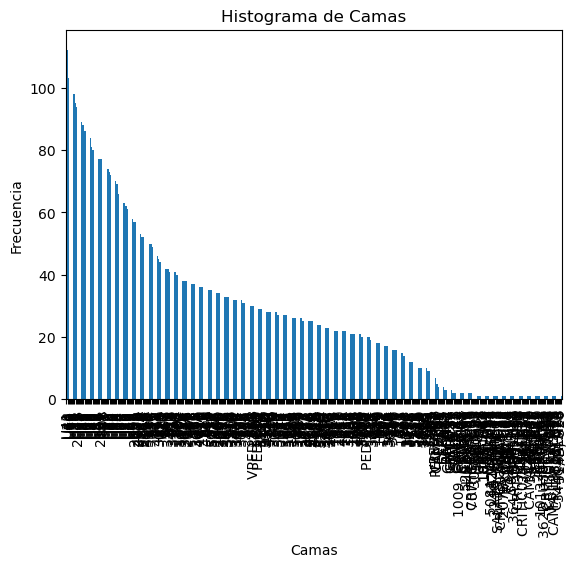

In [40]:

conteos = df['cama'].value_counts()

# Crea el histograma de variables categóricas utilizando gráficos de barras
conteos.plot(kind='bar')
plt.xticks(rotation=90)
# Personaliza el gráfico
plt.title('Histograma de Camas')
plt.xlabel('Camas')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

#### Vemos que la variable cama tiene una granularidad muy detallada para realizar análisis sobre este parámetro, y tampoco es una variable que influya en los tiempos de despacho.

### PASO 5: INICIAMOS ANÁLISIS UNIVARIADO NUMÉRICAS

In [42]:
min_valor = df['mins_enf_to_despacho2'].min()

print("El mínimo tiempo registrado de despacho:", min_valor)

El mínimo tiempo registrado de despacho: 0.12


In [43]:
max_valor = df['mins_enf_to_despacho2'].max()

print("El máximo registrado de despacho:", max_valor)

El máximo registrado de despacho: 6520.68


In [44]:
min_valor = df['mins_despacho_to_patin2'].min()

print("El mínimo tiempo registrado de solicitud patinador:", min_valor)

El mínimo tiempo registrado de solicitud patinador: 0.03


In [45]:
max_valor = df['mins_despacho_to_patin2'].max()

print("El máximo registrado de solicitud patinador:", max_valor)

El máximo registrado de solicitud patinador: 171.42


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12322 entries, 0 to 22743
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solicitud_id             12322 non-null  int64  
 1   documento_despacho_id    12322 non-null  int32  
 2   tipo_solicitud           12322 non-null  int64  
 3   ingreso                  12322 non-null  int64  
 4   lista_datos_formulacion  12322 non-null  object 
 5   lista_datos_productos    12322 non-null  object 
 6   cant_productos           12322 non-null  int64  
 7   estacion_id              12322 non-null  object 
 8   cama                     12322 non-null  object 
 9   usuario_id_solicita      12322 non-null  int64  
 10  usuario_id_despacha      12322 non-null  object 
 11  mins_enf_to_despacho2    12322 non-null  float64
 12  mins_despacho_to_patin2  12322 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 1.3+ MB


In [47]:
df.head(2)

,solicitud_id,documento_despacho_id,tipo_solicitud,ingreso,lista_datos_formulacion,lista_datos_productos,cant_productos,estacion_id,cama,usuario_id_solicita,usuario_id_despacha,mins_enf_to_despacho2,mins_despacho_to_patin2
0,13708386,12802961,1,6199288,"1-NORMAL,9-MEDICAMENTOS MEZCLAS NORMAL","1-0102020976,3-0102020978,5-0102012042",3,UCI5,U47,13733,15459.0,15.75,6.66
1,13710100,12804843,1,6199288,1-NORMAL,"3-0102011818,3-0102012045,3-0102020986,3-0102020988",4,UCI5,U47,13733,15459.0,19.02,6.65


In [48]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")

# describe(): Va columna por columna diciéndome lo que tiene, sólo columnas numéricas porque me va a realizar operaciones estadísticas y no se hace operaciones sobre una variable que contenga texto
print(df.describe()) 


Estadísticas descriptivas:
       solicitud_id  documento_despacho_id  tipo_solicitud       ingreso  \
count  1.232200e+04           1.232200e+04         12322.0  1.232200e+04   
mean   1.371361e+07           1.280774e+07             1.0  6.177579e+06   
std    5.246380e+04           4.745349e+04             0.0  3.276722e+04   
min    1.355670e+07           1.266507e+07             1.0  6.006731e+06   
25%    1.367418e+07           1.277229e+07             1.0  6.162545e+06   
50%    1.371452e+07           1.280877e+07             1.0  6.182212e+06   
75%    1.375749e+07           1.284753e+07             1.0  6.199382e+06   
max    1.380000e+07           1.288549e+07             1.0  6.232462e+06   

       cant_productos  usuario_id_solicita  mins_enf_to_despacho2  \
count    12322.000000         12322.000000           12322.000000   
mean         1.444571         12126.822675              31.877810   
std          1.165009          3174.457008             124.209967   
min        

### Histograma de la frecuencia de la cantidad de productos

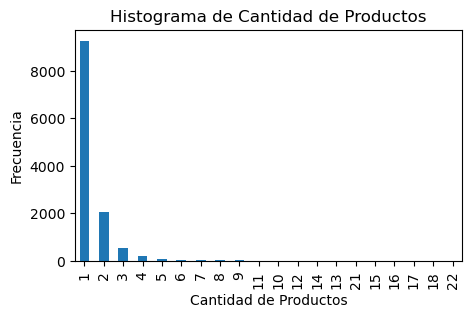

In [49]:
conteos = df['cant_productos'].value_counts()
plt.figure(figsize=(5, 3))
# Crea el histograma de variables categóricas utilizando gráficos de barras
conteos.plot(kind='bar')

# Personaliza el gráfico
plt.title('Histograma de Cantidad de Productos')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

In [50]:
conteo_valores = df['cant_productos'].value_counts()
conteo_valores

cant_productos
1     9252
2     2042
3      546
4      213
5       96
6       50
7       26
8       22
9       21
11      17
10      15
12      10
14       3
13       3
21       1
15       1
16       1
17       1
18       1
22       1
Name: count, dtype: int64

In [51]:
df.head(1)

,solicitud_id,documento_despacho_id,tipo_solicitud,ingreso,lista_datos_formulacion,lista_datos_productos,cant_productos,estacion_id,cama,usuario_id_solicita,usuario_id_despacha,mins_enf_to_despacho2,mins_despacho_to_patin2
0,13708386,12802961,1,6199288,"1-NORMAL,9-MEDICAMENTOS MEZCLAS NORMAL","1-0102020976,3-0102020978,5-0102012042",3,UCI5,U47,13733,15459.0,15.75,6.66


# 

In [52]:
df.head(1)

,solicitud_id,documento_despacho_id,tipo_solicitud,ingreso,lista_datos_formulacion,lista_datos_productos,cant_productos,estacion_id,cama,usuario_id_solicita,usuario_id_despacha,mins_enf_to_despacho2,mins_despacho_to_patin2
0,13708386,12802961,1,6199288,"1-NORMAL,9-MEDICAMENTOS MEZCLAS NORMAL","1-0102020976,3-0102020978,5-0102012042",3,UCI5,U47,13733,15459.0,15.75,6.66


c:\Users\kenny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


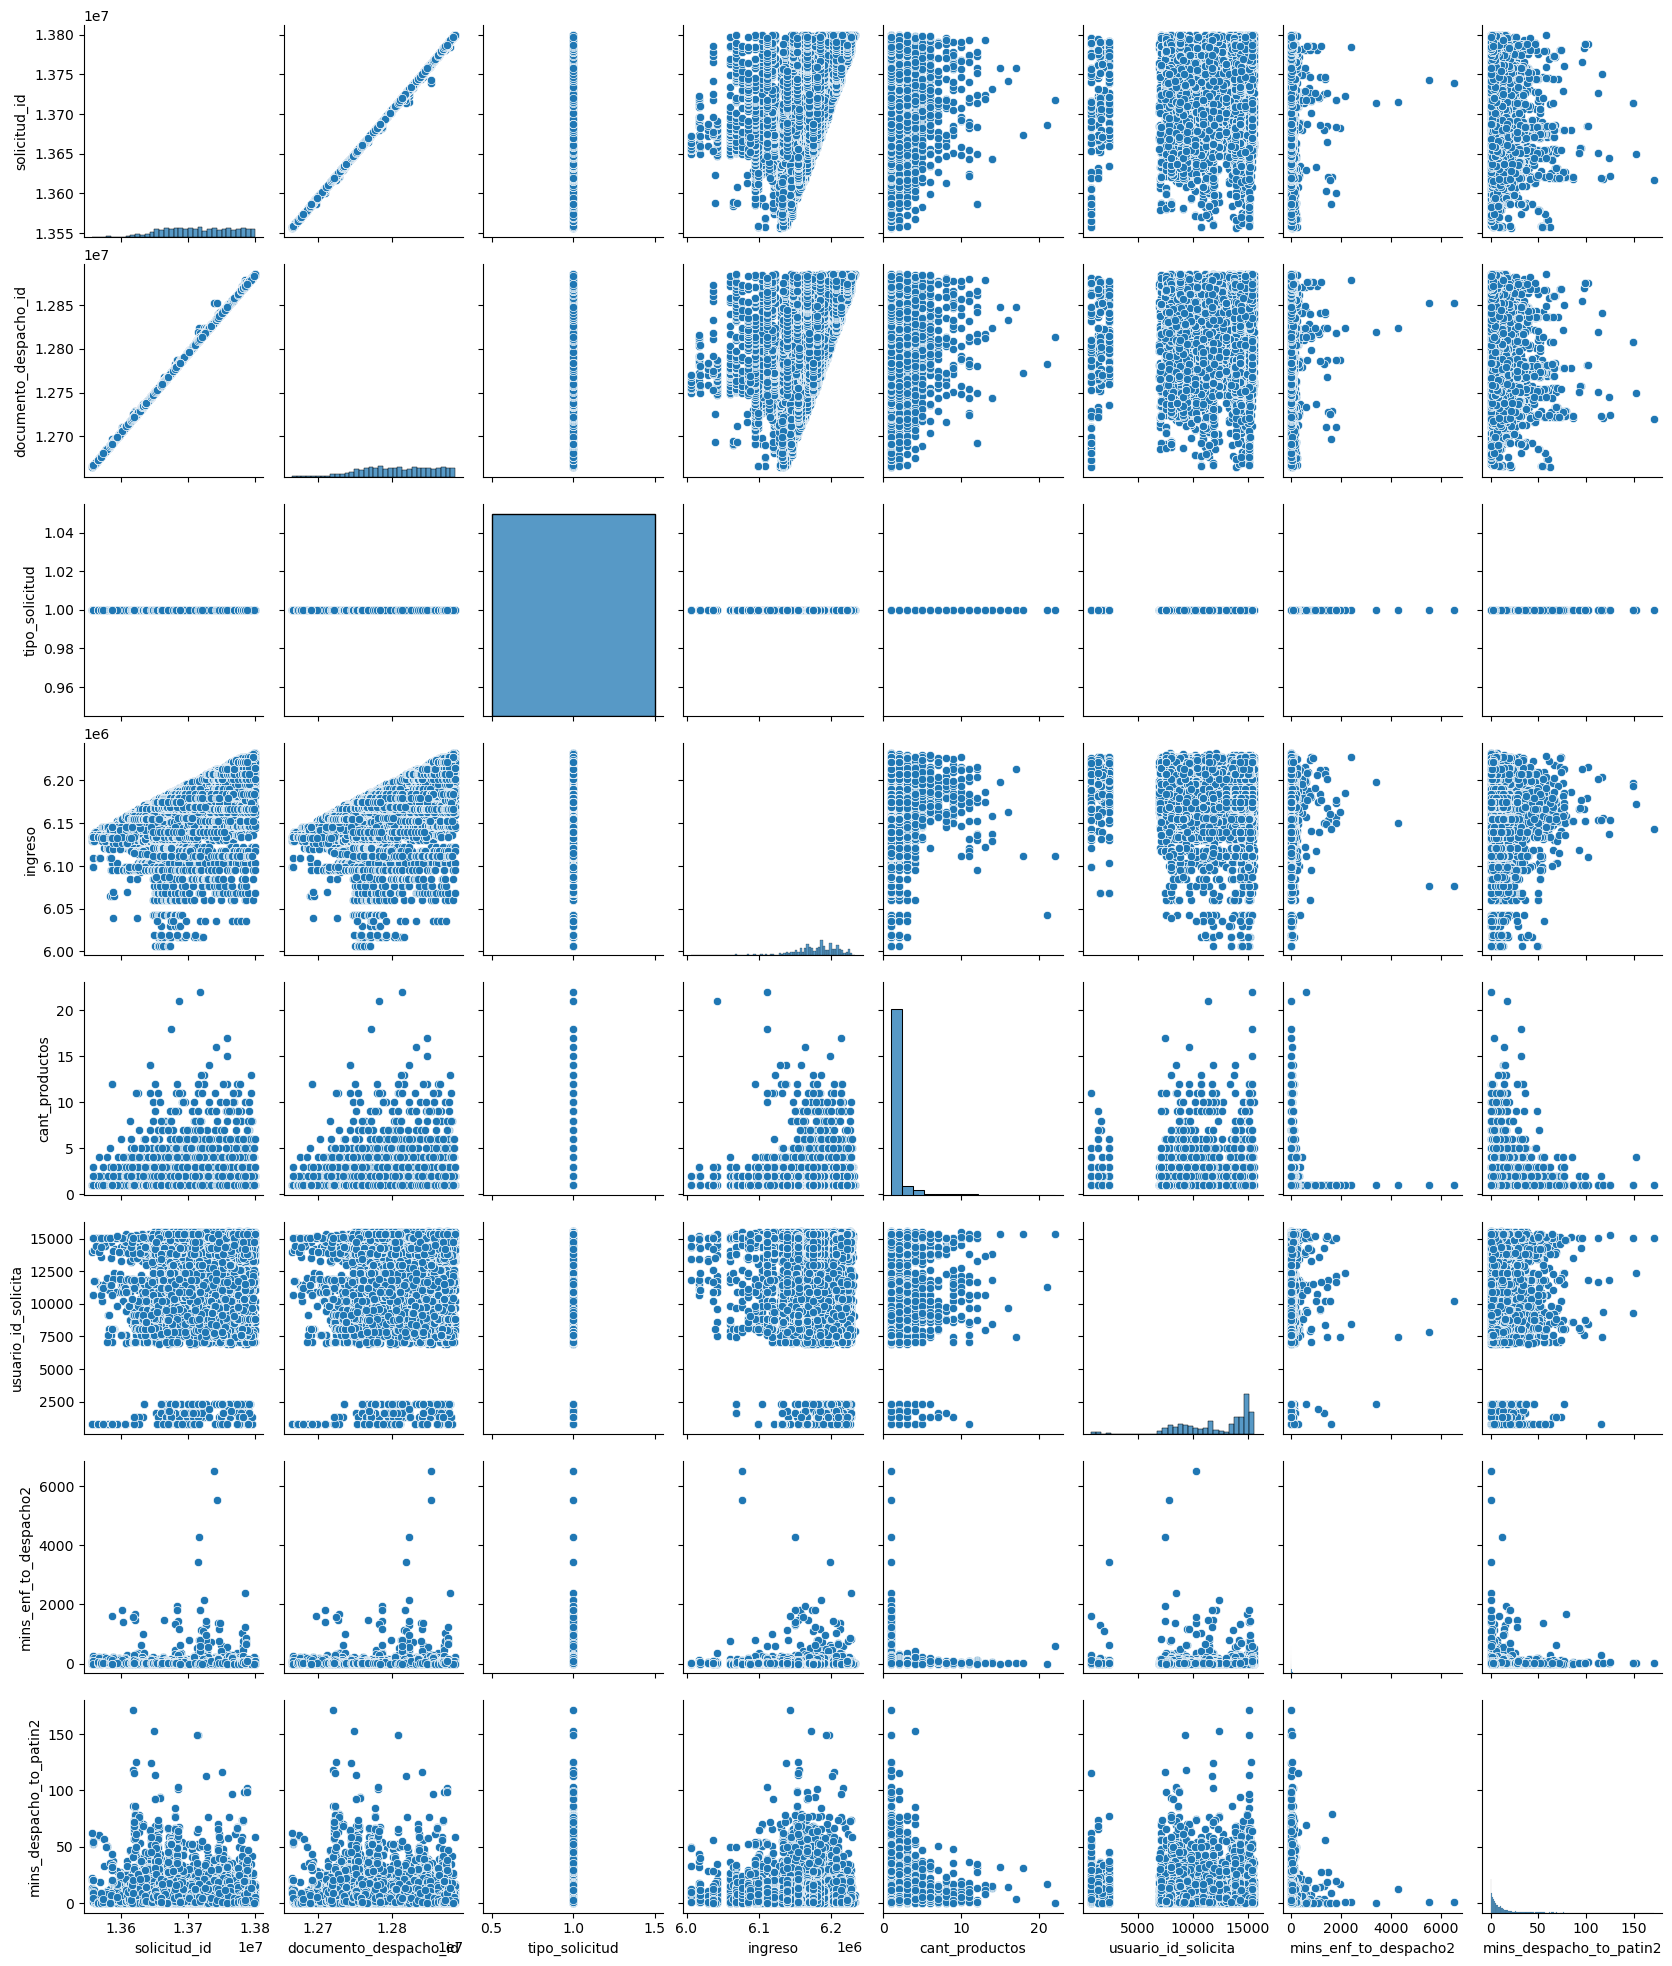

In [53]:
sns.pairplot(df, aspect=.85);

In [54]:
print(df.describe()) 

       solicitud_id  documento_despacho_id  tipo_solicitud       ingreso  \
count  1.232200e+04           1.232200e+04         12322.0  1.232200e+04   
mean   1.371361e+07           1.280774e+07             1.0  6.177579e+06   
std    5.246380e+04           4.745349e+04             0.0  3.276722e+04   
min    1.355670e+07           1.266507e+07             1.0  6.006731e+06   
25%    1.367418e+07           1.277229e+07             1.0  6.162545e+06   
50%    1.371452e+07           1.280877e+07             1.0  6.182212e+06   
75%    1.375749e+07           1.284753e+07             1.0  6.199382e+06   
max    1.380000e+07           1.288549e+07             1.0  6.232462e+06   

       cant_productos  usuario_id_solicita  mins_enf_to_despacho2  \
count    12322.000000         12322.000000           12322.000000   
mean         1.444571         12126.822675              31.877810   
std          1.165009          3174.457008             124.209967   
min          1.000000           771.000

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12322 entries, 0 to 22743
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solicitud_id             12322 non-null  int64  
 1   documento_despacho_id    12322 non-null  int32  
 2   tipo_solicitud           12322 non-null  int64  
 3   ingreso                  12322 non-null  int64  
 4   lista_datos_formulacion  12322 non-null  object 
 5   lista_datos_productos    12322 non-null  object 
 6   cant_productos           12322 non-null  int64  
 7   estacion_id              12322 non-null  object 
 8   cama                     12322 non-null  object 
 9   usuario_id_solicita      12322 non-null  int64  
 10  usuario_id_despacha      12322 non-null  object 
 11  mins_enf_to_despacho2    12322 non-null  float64
 12  mins_despacho_to_patin2  12322 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 1.3+ MB


In [56]:
conteo_valores = df['lista_datos_formulacion'].value_counts()
conteo_valores

lista_datos_formulacion
1-NORMAL                                     12011
7-ONCOLOGIA                                     78
1-NORMAL,9-MEDICAMENTOS MEZCLAS NORMAL          69
2-RESCATE                                       38
9-MEDICAMENTOS MEZCLAS NORMAL                   29
1-NORMAL,7-ONCOLOGIA                            22
1-NORMAL,2-RESCATE                              21
1-NORMAL,3-CARGA                                18
3-CARGA                                         17
8-AMBULATORIA                                    6
5-NUTRICION PARENTERAL                           4
1-NORMAL,5-NUTRICION PARENTERAL                  3
5-NUTRICION PARENTERAL,7-ONCOLOGIA               2
1-NORMAL,4-PREPARACION MAGISTRAL                 1
7-ONCOLOGIA,9-MEDICAMENTOS MEZCLAS NORMAL        1
4-PREPARACION MAGISTRAL                          1
1-NORMAL,8-AMBULATORIA                           1
Name: count, dtype: int64

In [57]:
df2 = df
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12322 entries, 0 to 22743
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solicitud_id             12322 non-null  int64  
 1   documento_despacho_id    12322 non-null  int32  
 2   tipo_solicitud           12322 non-null  int64  
 3   ingreso                  12322 non-null  int64  
 4   lista_datos_formulacion  12322 non-null  object 
 5   lista_datos_productos    12322 non-null  object 
 6   cant_productos           12322 non-null  int64  
 7   estacion_id              12322 non-null  object 
 8   cama                     12322 non-null  object 
 9   usuario_id_solicita      12322 non-null  int64  
 10  usuario_id_despacha      12322 non-null  object 
 11  mins_enf_to_despacho2    12322 non-null  float64
 12  mins_despacho_to_patin2  12322 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 1.3+ MB


### Paso 7: Análisis Correlacion entre variables
#### Codificar variables categóricas

In [58]:
X = df2[['tipo_solicitud', 'lista_datos_formulacion', 'lista_datos_productos', 'cant_productos', 'estacion_id',
       'cama', 'usuario_id_solicita', 'usuario_id_despacha']]
y = df2[['mins_enf_to_despacho2']]

In [59]:
df2.head(1)

,solicitud_id,documento_despacho_id,tipo_solicitud,ingreso,lista_datos_formulacion,lista_datos_productos,cant_productos,estacion_id,cama,usuario_id_solicita,usuario_id_despacha,mins_enf_to_despacho2,mins_despacho_to_patin2
0,13708386,12802961,1,6199288,"1-NORMAL,9-MEDICAMENTOS MEZCLAS NORMAL","1-0102020976,3-0102020978,5-0102012042",3,UCI5,U47,13733,15459.0,15.75,6.66


In [60]:
from sklearn.preprocessing import LabelEncoder

# Creamos un objeto LabelEncoder
label_encoder = LabelEncoder()

# Codificar la variable categórica
#df2['Categoria_TiposFormulacion'] = label_encoder.fit_transform(df2['lista_datos_formulacion'])
#df2['Categoria_Productos'] = label_encoder.fit_transform(df2['lista_datos_productos'])
df2['Categoria_Estacion'] = label_encoder.fit_transform(df2['estacion_id'])
df2['Categoria_Cama'] = label_encoder.fit_transform(df2['cama'])

columnas_a_eliminar = ['lista_datos_formulacion', 'lista_datos_productos', 'estacion_id', 'cama']

# Eliminar las columnas especificadas
df2 = df2.drop(columns=columnas_a_eliminar)

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12322 entries, 0 to 22743
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solicitud_id             12322 non-null  int64  
 1   documento_despacho_id    12322 non-null  int32  
 2   tipo_solicitud           12322 non-null  int64  
 3   ingreso                  12322 non-null  int64  
 4   cant_productos           12322 non-null  int64  
 5   usuario_id_solicita      12322 non-null  int64  
 6   usuario_id_despacha      12322 non-null  object 
 7   mins_enf_to_despacho2    12322 non-null  float64
 8   mins_despacho_to_patin2  12322 non-null  float64
 9   Categoria_Estacion       12322 non-null  int32  
 10  Categoria_Cama           12322 non-null  int32  
dtypes: float64(2), int32(3), int64(5), object(1)
memory usage: 1010.8+ KB


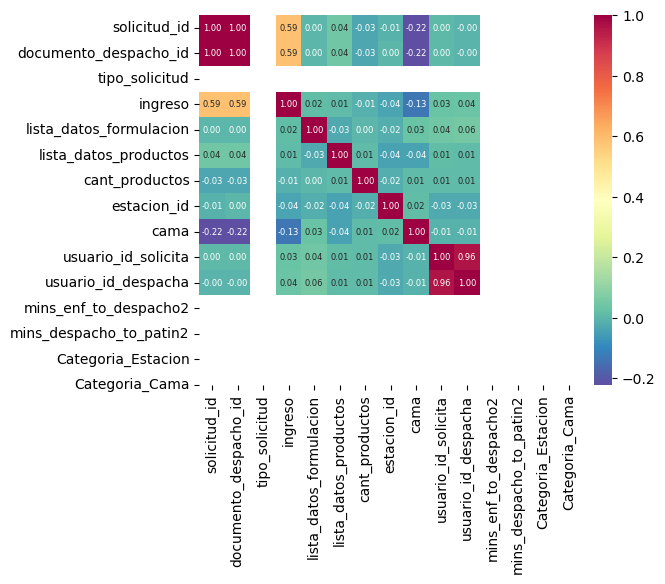

In [62]:
# Correlación entre variables
corrmat = df2.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':6},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r")
plt.show()

In [63]:
print(df.describe())

       solicitud_id  documento_despacho_id  tipo_solicitud       ingreso  \
count  1.232200e+04           1.232200e+04         12322.0  1.232200e+04   
mean   1.371361e+07           1.280774e+07             1.0  6.177579e+06   
std    5.246380e+04           4.745349e+04             0.0  3.276722e+04   
min    1.355670e+07           1.266507e+07             1.0  6.006731e+06   
25%    1.367418e+07           1.277229e+07             1.0  6.162545e+06   
50%    1.371452e+07           1.280877e+07             1.0  6.182212e+06   
75%    1.375749e+07           1.284753e+07             1.0  6.199382e+06   
max    1.380000e+07           1.288549e+07             1.0  6.232462e+06   

       cant_productos  usuario_id_solicita  mins_enf_to_despacho2  \
count    12322.000000         12322.000000           12322.000000   
mean         1.444571         12126.822675              31.877810   
std          1.165009          3174.457008             124.209967   
min          1.000000           771.000

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['lista_datos_formulacion', 'lista_datos_productos', 'estacion_id', 'cama']  #columnas categóricas

#transformador de columnas, aplicando OneHotEncoder solo a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Esto permite que el resto de las columnas pasen sin cambios
)

In [ ]:
from sklearn.decomposition import TruncatedSVD

from sklearn.pipeline import Pipeline

# Importamos un clasificador: Support Vector Classifier
from sklearn.svm import SVC

# Scaler estandar
from sklearn.preprocessing import StandardScaler

# Splitter
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.impute import SimpleImputer

# Dividimos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Crea el pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),        
    #('pca', PCA(n_components=2)),  
    ('svd', TruncatedSVD(n_components=100)),      
    ('classifier', GradientBoostingClassifier())  
])

# El pipeline puede usarse como un estimador
# y evita data leaking del test set en el train set

# Se aplican los pasos en el dataset de entrenamiento
pipe.fit(X_train, y_train)

# se aplican los pasos en el dataset de prueba
pipe.score(X_test, y_test)

## CONCLUSIONES

### Dando respuesta a la smart question : # ¿Cuáles características en una solicitud de medicamentos o insumos son más influyentes en el tiempo de despacho?

#### Variables mas influyentes:
##### >>Tipo de Formulación
##### >>Cantidad de productos
##### >>Auxiliar de Farmacia

In [183]:
df2.isnull().sum()

solicitud_id               0
documento_despacho_id      0
tipo_solicitud             0
ingreso                    0
cant_productos             0
usuario_id_solicita        0
usuario_id_despacha        0
mins_enf_to_despacho2      0
mins_despacho_to_patin2    0
Categoria_Estacion         0
Categoria_Cama             0
dtype: int64

In [181]:
correlacion = df2.corr()
print(correlacion)

                         solicitud_id  documento_despacho_id  tipo_solicitud  \
solicitud_id                 1.000000               0.999946             NaN   
documento_despacho_id        0.999946               1.000000             NaN   
tipo_solicitud                    NaN                    NaN             NaN   
ingreso                      0.588751               0.588341             NaN   
cant_productos               0.000635               0.000474             NaN   
usuario_id_solicita          0.043518               0.043419             NaN   
usuario_id_despacha         -0.030442              -0.030911             NaN   
mins_enf_to_despacho2       -0.008166               0.000545             NaN   
mins_despacho_to_patin2     -0.221213              -0.221046             NaN   
Categoria_Estacion           0.003454               0.003076             NaN   
Categoria_Cama              -0.004311              -0.004771             NaN   

                          ingreso  cant